## Minimal Julia setup of toy hypothesis test model selection 
Scott's minimal setup was two models: 
#### Model 1
$$ X_i \sim \mathcal{N}(0,s^2)$$
#### Model 2
$$ X_i \sim \mathcal{N}(\mu,1), \qquad \mu \sim \mathrm{Unif}(-\eta,\eta)$$
This is a nice toy setup because if our data really comes from model 1, but we do inference/model selection on this, model 2 recovers model 1 in the limit that $\eta \to 0$. 

## Part 1: basic inference
Here I am just showing off Julia's sampling ability. Way easier than Stan. 

In [1]:
# Import libraries.
using Turing, StatsPlots, Random, MCMCChains, MCMCDiagnosticTools, Distributions, Optim, SpecialFunctions

In [2]:
mu_true = 0;
sigma_true = 1;

Ndata = 5000;

# real data comes from N(0,1)
data = rand(Normal(mu_true,sigma_true),Ndata);

In [3]:
@model function model1(y)
    # sets the prior for variance of model 1 (can't remember what Jeffreys is)
    s² ~ InverseGamma(2, 1)

    # The number of observations.
    N = length(y)
    for n in 1:N
        # data from standard normal
        y[n] ~ Normal(0, sqrt(s²))
    end
end

model1 (generic function with 2 methods)

In [4]:
@model function model2(y)
    # sets the prior for variance of model 2 (can't remember what Jeffreys is)
    eta ~ InverseGamma(3, 3)
    mu ~ Uniform(-eta,eta)

    # The number of observations.
    N = length(y)
    for n in 1:N
        # data from standard normal
          y[n] ~ Normal(mu, 1)
    end
end

model2 (generic function with 2 methods)

In [5]:
# associate models with data
model1_full = model1(data);
model2_full = model2(data);

In [6]:
chain1 = sample(model1_full,NUTS(.65),1000); 

Sampling   0%|█                                         |  ETA: N/A
┌ Info: Found initial step size
│   ϵ = 0.05
└ @ Turing.Inference C:\Users\Chris\.julia\packages\Turing\uMoX1\src\inference\hmc.jl:188
Sampling   0%|█                                         |  ETA: 0:25:41
Sampling   1%|█                                         |  ETA: 0:12:50
Sampling   1%|█                                         |  ETA: 0:08:31
Sampling   2%|█                                         |  ETA: 0:06:21
Sampling   2%|█                                         |  ETA: 0:05:04
Sampling   3%|██                                        |  ETA: 0:04:12
Sampling   3%|██                                        |  ETA: 0:03:35
Sampling   4%|██                                        |  ETA: 0:03:07
Sampling   4%|██                                        |  ETA: 0:02:46
Sampling   5%|██                                        |  ETA: 0:02:28
Sampling   5%|███                                       |  ETA: 0:02:14
Sampl


Sampling  46%|████████████████████                      |  ETA: 0:00:09
Sampling  47%|████████████████████                      |  ETA: 0:00:09
Sampling  47%|████████████████████                      |  ETA: 0:00:08
Sampling  48%|████████████████████                      |  ETA: 0:00:08
Sampling  48%|█████████████████████                     |  ETA: 0:00:08
Sampling  49%|█████████████████████                     |  ETA: 0:00:08
Sampling  49%|█████████████████████                     |  ETA: 0:00:08
Sampling  49%|█████████████████████                     |  ETA: 0:00:08
Sampling  50%|█████████████████████                     |  ETA: 0:00:08
Sampling  50%|██████████████████████                    |  ETA: 0:00:07
Sampling  51%|██████████████████████                    |  ETA: 0:00:07
Sampling  51%|██████████████████████                    |  ETA: 0:00:07
Sampling  52%|██████████████████████                    |  ETA: 0:00:07
Sampling  52%|██████████████████████                    |  ETA:


Sampling  82%|███████████████████████████████████       |  ETA: 0:00:02
Sampling  82%|███████████████████████████████████       |  ETA: 0:00:02
Sampling  83%|███████████████████████████████████       |  ETA: 0:00:02
Sampling  83%|███████████████████████████████████       |  ETA: 0:00:02
Sampling  84%|████████████████████████████████████      |  ETA: 0:00:01
Sampling  84%|████████████████████████████████████      |  ETA: 0:00:01
Sampling  84%|████████████████████████████████████      |  ETA: 0:00:01
Sampling  85%|████████████████████████████████████      |  ETA: 0:00:01
Sampling  85%|████████████████████████████████████      |  ETA: 0:00:01
Sampling  86%|█████████████████████████████████████     |  ETA: 0:00:01
Sampling  86%|█████████████████████████████████████     |  ETA: 0:00:01
Sampling  87%|█████████████████████████████████████     |  ETA: 0:00:01
Sampling  87%|█████████████████████████████████████     |  ETA: 0:00:01
Sampling  88%|█████████████████████████████████████     |  ETA:

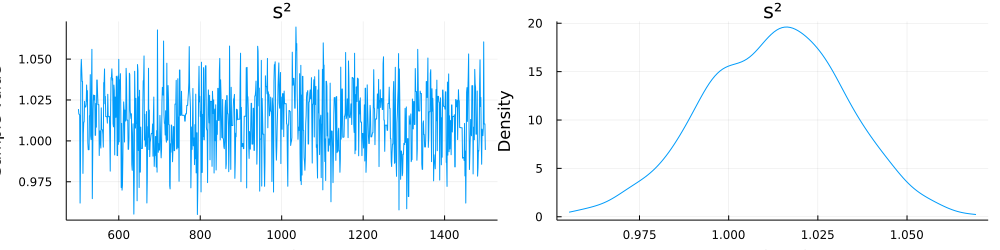

In [7]:
plot(chain1)

In [8]:
chain2 = sample(model2_full,NUTS(.65),1000); 

Sampling   0%|█                                         |  ETA: N/A
┌ Info: Found initial step size
│   ϵ = 0.4
└ @ Turing.Inference C:\Users\Chris\.julia\packages\Turing\uMoX1\src\inference\hmc.jl:188
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\Chris\.julia\packages\AdvancedHMC\w90s5\src\hamiltonian.jl:47
Sampling   0%|█                                         |  ETA: 0:11:50
Sampling   1%|█                                         |  ETA: 0:05:54
Sampling   1%|█                                         |  ETA: 0:03:55
Sampling   2%|█                                         |  ETA: 0:02:56
Sampling   2%|█                                         |  ETA: 0:02:20
Sampling   3%|██                                        |  ETA: 0:01:56
Sampling   3%|██                                        |  ETA: 0:01:39
Sampling   4%|██                                        |  ETA: 0:01:26

Sampling  33%|██████████████                            |  ETA: 0:00:07
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\Chris\.julia\packages\AdvancedHMC\w90s5\src\hamiltonian.jl:47
Sampling  34%|███████████████                           |  ETA: 0:00:07
Sampling  34%|███████████████                           |  ETA: 0:00:07
Sampling  35%|███████████████                           |  ETA: 0:00:07
Sampling  35%|███████████████                           |  ETA: 0:00:07
Sampling  35%|███████████████                           |  ETA: 0:00:06
Sampling  36%|████████████████                          |  ETA: 0:00:06
Sampling  36%|████████████████                          |  ETA: 0:00:06
Sampling  37%|████████████████                          |  ETA: 0:00:06
Sampling  37%|████████████████                          |  ETA: 0:00:06
Sampling  38%|████████████████                          |


Sampling  70%|██████████████████████████████            |  ETA: 0:00:02
Sampling  71%|██████████████████████████████            |  ETA: 0:00:02
Sampling  71%|██████████████████████████████            |  ETA: 0:00:01
Sampling  72%|███████████████████████████████           |  ETA: 0:00:01
Sampling  72%|███████████████████████████████           |  ETA: 0:00:01
Sampling  73%|███████████████████████████████           |  ETA: 0:00:01
Sampling  73%|███████████████████████████████           |  ETA: 0:00:01
Sampling  74%|███████████████████████████████           |  ETA: 0:00:01
Sampling  74%|████████████████████████████████          |  ETA: 0:00:01
Sampling  75%|████████████████████████████████          |  ETA: 0:00:01
Sampling  75%|████████████████████████████████          |  ETA: 0:00:01
Sampling  76%|████████████████████████████████          |  ETA: 0:00:01
Sampling  76%|████████████████████████████████          |  ETA: 0:00:01
Sampling  77%|█████████████████████████████████         |  ETA:

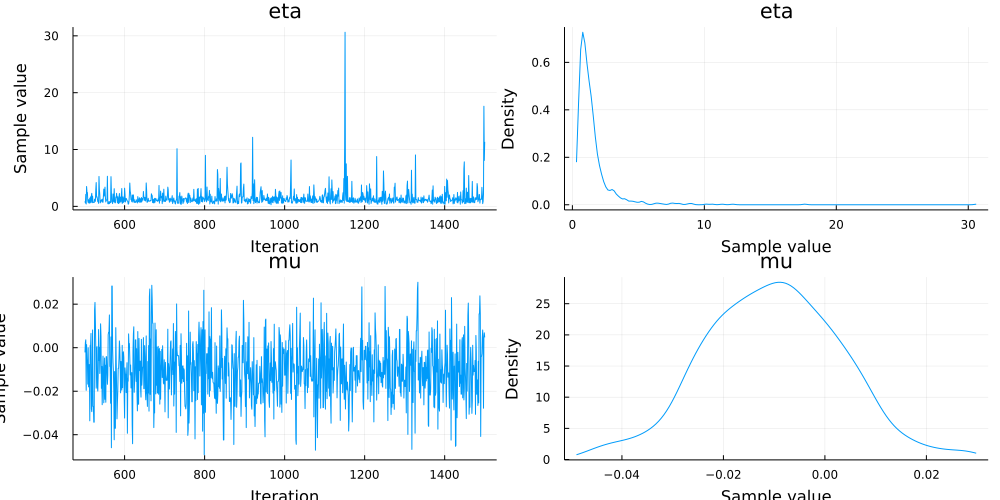

In [9]:
plot(chain2)

In [10]:
mle1_estimate = optimize(model1_full, MLE())


ModeResult with maximized lp of -7126.01
1-element Named Vector{Float64}
A   │ 
────┼───────
:s² │ 1.0126

In [11]:
map1_estimate = optimize(model1_full, MAP())

ModeResult with maximized lp of -7127.03
1-element Named Vector{Float64}
A   │ 
────┼────────
:s² │ 1.01179

In [12]:
mle2_estimate = optimize(model2_full, MLE())


ModeResult with maximized lp of -7125.92
2-element Named Vector{Float64}
A    │ 
─────┼───────────
:eta │    3.07637
:mu  │ -0.0106526

In [13]:
map2_estimate = optimize(model2_full, MAP())

ModeResult with maximized lp of -7126.46
2-element Named Vector{Float64}
A    │ 
─────┼───────────
:eta │        0.6
:mu  │ -0.0106526

## Part 2
Here I will try to simulate the distribution for the likelihood ratio test statistic 
$$
T = -2 \left[ \log \hat{L}_1 - \log \hat{L}_2 \right]
$$
Where here these are just the empirical values of the MLE-fitted likelihoods. I am not sure if the numerator is right. Maybe it should be replaced with assuming $s^2=1$.

In [21]:
mu_true = 0;
sigma_true = 1;

Ndata = 5000;
Nexperiments = 1000;  # repeat the experiment this many times for test statistic 

model1_ests = zeros(1,Nexperiments)
model2_ests = zeros(1,Nexperiments)

logLs_model1 = zeros(1,Nexperiments)
logLs_model2 = zeros(1,Nexperiments)

Tvals =  zeros(1,Nexperiments);
T1vals =  zeros(1,Nexperiments);
T2vals =  zeros(1,Nexperiments);


In [22]:
for m in 1:Nexperiments
    data_m=  rand(Normal(mu_true,sigma_true),Ndata);
    # associate models with data
    model1_m = model1(data_m);
    model2_m = model2(data_m);
    mle1_estimate = optimize(model1_m, MLE())
    mle2_estimate = optimize(model2_m, MLE())
    model1_estval=mle1_estimate.values.array[1];
    model2_estval=mle2_estimate.values.array[1];
    model1_ests[m]=model1_estval;
    model2_ests[m]=model2_estval;
    logl_model1 = loglikelihood(Normal(0,sqrt(model1_estval)),data_m)
    logl_model0 = loglikelihood(Normal(0,1),data_m)
  

    loglivals = zeros(1,Ndata)
    for i in 1:Ndata
        xi = data_m[i]
        li = (erf((xi+model2_estval)/sqrt(2))-erf((xi-model2_estval)/sqrt(2)))/(4*model2_estval)
        loglivals[i] = log(li)  
    end 
    logl_model2= sum(loglivals)

    logLs_model1[m] = logl_model1;
    logLs_model2[m] = logl_model2;
    T = -2(logl_model1-logl_model2);
    T1 = -2(logl_model0-logl_model1);
    T2 = -2(logl_model0-logl_model2);


    Tvals[m] = T;
    T1vals[m] =T1;
    T2vals[m]=T2;
    
end 

let's first see if our MLE estimates look reasonable

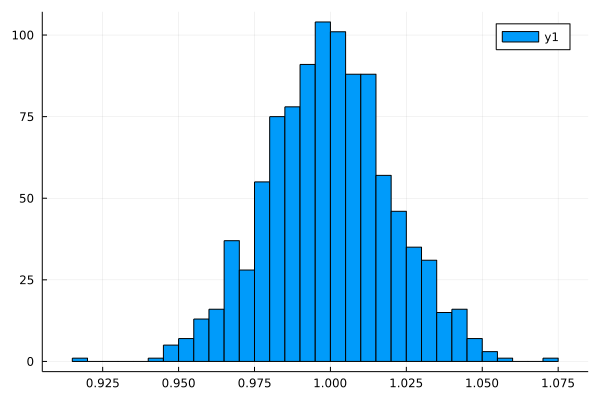

In [23]:
histogram(model1_ests')

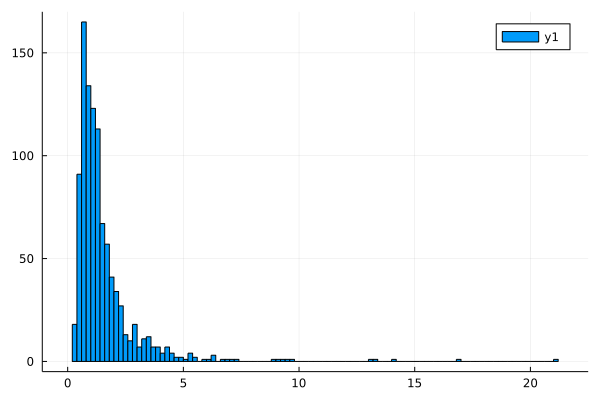

In [24]:
histogram(model2_ests')

those look fine, but the likelihood ratio statistic doesn't look quite right... 

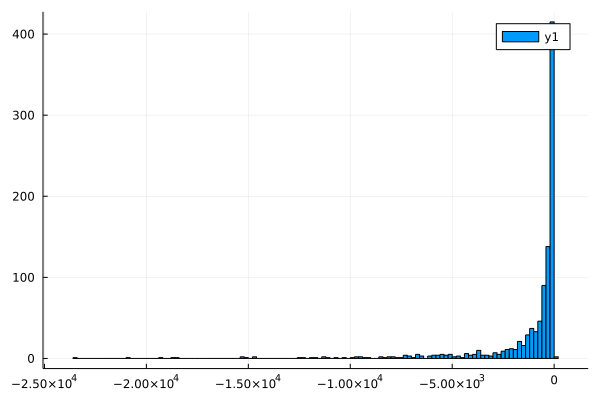

In [25]:
histogram(Tvals')

they're all negative, which is confusing because it says that model 2 is more probable? or am I flipping this?

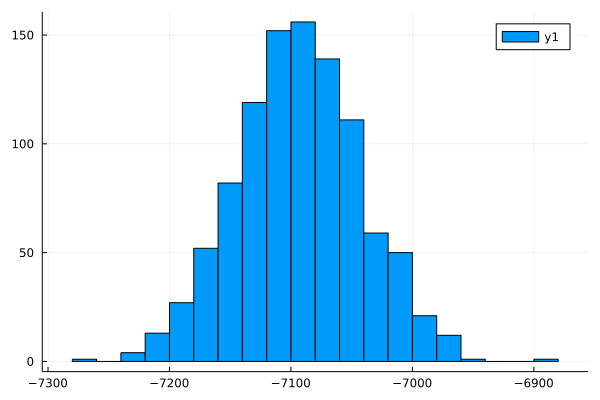

In [26]:
histogram(logLs_model1')

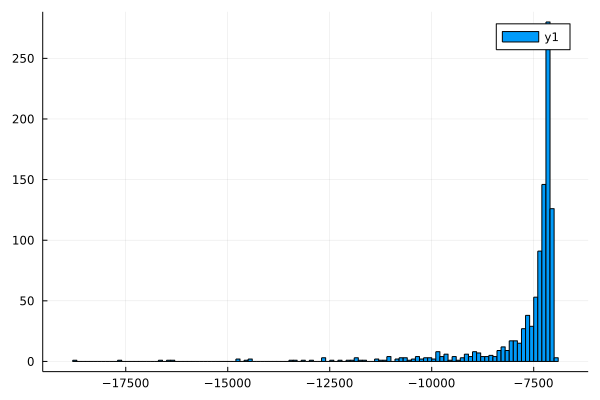

In [27]:
histogram(logLs_model2')

#### One more idea
Maybe that test statistic is wrong, and I should be comparing the "true" $N(0,1)$ model and get a test statistic for each?

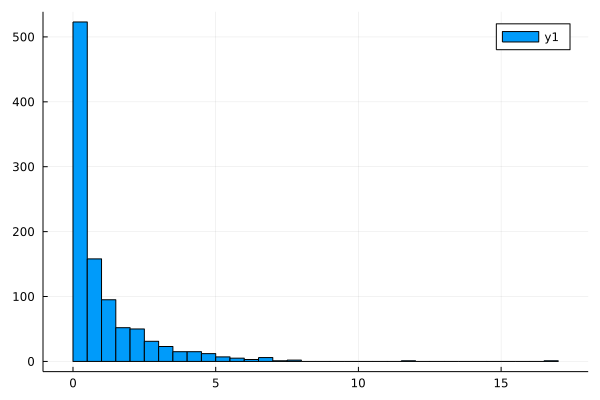

In [28]:
histogram(T1vals')

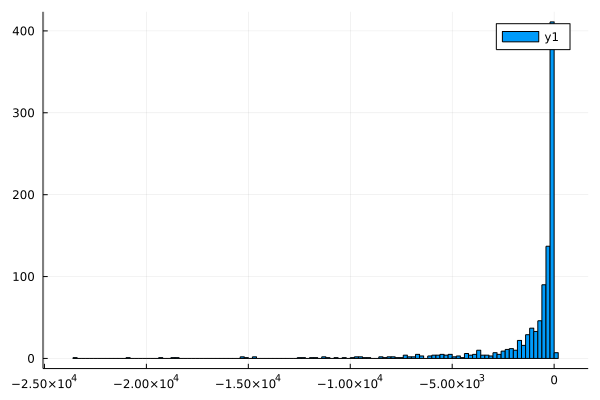

In [29]:
histogram(T2vals')

this doesn't make sense. maybe because we they aren't nested? 